For Reference : https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
Download dataset from wget : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd 
import os 
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
creditcard_df = pd.read_csv('../data/creditcard.csv')
print creditcard_df.shape
creditcard_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# percentage of missing values in each column
creditcard_df.isnull().sum()/len(creditcard_df.index)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


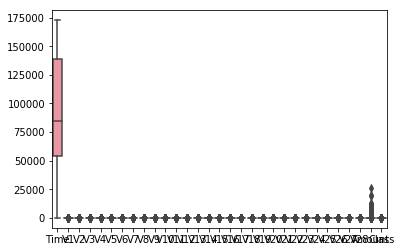

In [5]:
sns.boxplot(data=creditcard_df)

In [6]:
# Shuffle the Dataset.
creditcard_df = creditcard_df.sample(frac=1,random_state=4)
creditcard_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
135406,81240.0,0.999672,-0.034679,0.446984,1.374760,-0.272838,0.033625,0.025702,0.118362,0.052625,...,-0.006060,0.042805,-0.095535,0.227518,0.575778,-0.347302,0.024111,0.016893,64.00,0
137826,82347.0,-0.844413,1.032424,1.090921,-0.671593,-0.006061,-0.621923,0.322604,0.513167,-0.705964,...,-0.080023,-0.535090,0.005324,-0.042269,-0.453002,-0.127804,-0.057711,0.053107,0.89,0
70830,54035.0,-0.474271,1.027526,1.546229,-0.082036,0.180465,-0.407305,0.695010,0.025371,-0.522539,...,-0.186400,-0.415345,0.014862,0.076099,-0.236694,0.097987,0.284462,0.120016,8.99,0
194993,130854.0,-1.619583,-0.460686,0.219034,-0.418723,0.933105,-0.477342,0.902804,-0.120123,0.138692,...,-0.009905,0.886662,0.620723,-0.317571,0.048672,0.617770,0.383019,0.054503,75.98,0
87575,61745.0,-1.159349,0.816687,1.743063,-0.724069,-0.398590,-0.796834,0.275232,0.405158,-0.238336,...,-0.215970,-0.746148,-0.141145,0.423557,0.225527,0.749267,-0.169812,-0.036058,12.10,0
58922,48609.0,-0.527161,0.200911,1.821059,-2.068020,-0.025181,0.093388,0.035732,0.028121,-1.269504,...,0.101647,0.146677,-0.410605,-0.983874,0.500040,-0.289184,0.048504,0.057803,19.86,0
14329,25411.0,-1.271485,1.468437,-0.636989,-0.394338,2.138492,3.535837,-0.259180,1.170031,-0.461973,...,0.082528,-0.134647,-0.064862,0.982685,-0.050696,-0.444604,-0.401793,0.149573,6.48,0
110440,71826.0,1.096225,-0.854262,0.408811,-0.613771,-0.984417,-0.502653,-0.377324,-0.145042,-0.936799,...,0.026978,-0.279569,0.031661,0.092783,0.137730,-0.469841,0.006471,0.045504,147.60,0
89431,62576.0,0.974700,-0.956996,1.490097,0.474495,-1.290798,1.248123,-1.284833,0.583325,1.697556,...,-0.028082,0.270264,-0.106748,-0.181975,0.175866,1.156613,0.005694,0.010555,67.31,0
129035,78930.0,-1.144008,0.766896,2.381739,-0.024527,-0.404280,0.509322,0.491448,0.054743,0.056054,...,0.246352,0.730906,-0.492254,-0.428331,0.487274,-0.287019,-0.096385,0.054411,108.45,0


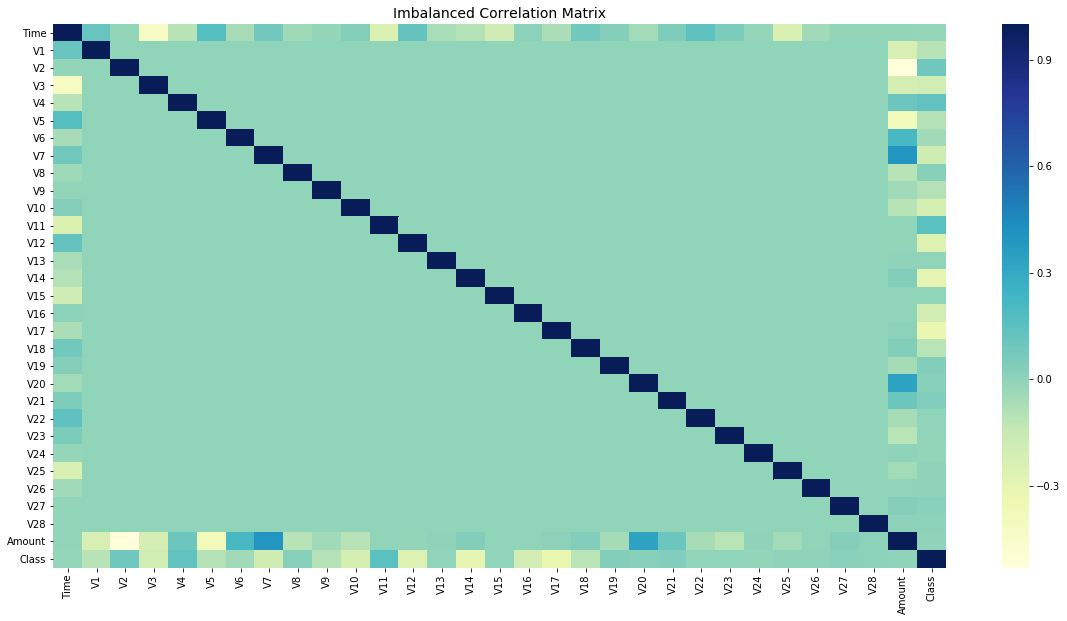

In [7]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = creditcard_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

True     284315
False       492
Name: Class, dtype: int64


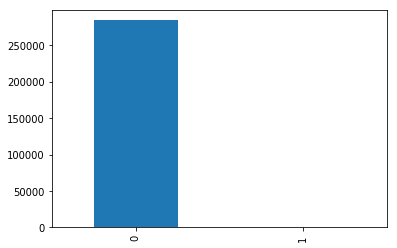

In [8]:
pd.value_counts(creditcard_df['Class']).plot.bar()
print  pd.value_counts(creditcard_df['Class']== 0 )

In [9]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,roc_auc_score,auc

X = creditcard_df.drop(['Class'],axis=1)
print X.shape
X.head()

(284807, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
135406,81240.0,0.999672,-0.034679,0.446984,1.374760,-0.272838,0.033625,0.025702,0.118362,0.052625,...,-0.090762,-0.006060,0.042805,-0.095535,0.227518,0.575778,-0.347302,0.024111,0.016893,64.00
137826,82347.0,-0.844413,1.032424,1.090921,-0.671593,-0.006061,-0.621923,0.322604,0.513167,-0.705964,...,-0.289995,-0.080023,-0.535090,0.005324,-0.042269,-0.453002,-0.127804,-0.057711,0.053107,0.89
70830,54035.0,-0.474271,1.027526,1.546229,-0.082036,0.180465,-0.407305,0.695010,0.025371,-0.522539,...,0.133436,-0.186400,-0.415345,0.014862,0.076099,-0.236694,0.097987,0.284462,0.120016,8.99
194993,130854.0,-1.619583,-0.460686,0.219034,-0.418723,0.933105,-0.477342,0.902804,-0.120123,0.138692,...,-0.517027,-0.009905,0.886662,0.620723,-0.317571,0.048672,0.617770,0.383019,0.054503,75.98
87575,61745.0,-1.159349,0.816687,1.743063,-0.724069,-0.398590,-0.796834,0.275232,0.405158,-0.238336,...,-0.122734,-0.215970,-0.746148,-0.141145,0.423557,0.225527,0.749267,-0.169812,-0.036058,12.10


In [10]:
y = creditcard_df['Class']
print y.shape
y.head()

(284807,)


135406    0
137826    0
70830     0
194993    0
87575     0
Name: Class, dtype: int64

In [11]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)
oversampled_train = pd.concat([ pd.DataFrame(oversampled_trainX),pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = creditcard_df.columns
oversampled_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,81240.0,0.999672,-0.034679,0.446984,1.374760,-0.272838,0.033625,0.025702,0.118362,0.052625,...,-0.006060,0.042805,-0.095535,0.227518,0.575778,-0.347302,0.024111,0.016893,64.00,0
1,82347.0,-0.844413,1.032424,1.090921,-0.671593,-0.006061,-0.621923,0.322604,0.513167,-0.705964,...,-0.080023,-0.535090,0.005324,-0.042269,-0.453002,-0.127804,-0.057711,0.053107,0.89,0
2,54035.0,-0.474271,1.027526,1.546229,-0.082036,0.180465,-0.407305,0.695010,0.025371,-0.522539,...,-0.186400,-0.415345,0.014862,0.076099,-0.236694,0.097987,0.284462,0.120016,8.99,0
3,130854.0,-1.619583,-0.460686,0.219034,-0.418723,0.933105,-0.477342,0.902804,-0.120123,0.138692,...,-0.009905,0.886662,0.620723,-0.317571,0.048672,0.617770,0.383019,0.054503,75.98,0
4,61745.0,-1.159349,0.816687,1.743063,-0.724069,-0.398590,-0.796834,0.275232,0.405158,-0.238336,...,-0.215970,-0.746148,-0.141145,0.423557,0.225527,0.749267,-0.169812,-0.036058,12.10,0


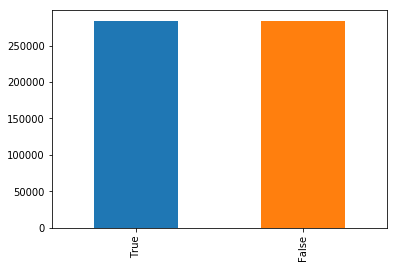

In [12]:
pd.value_counts(oversampled_train['Class']==1).plot.bar()

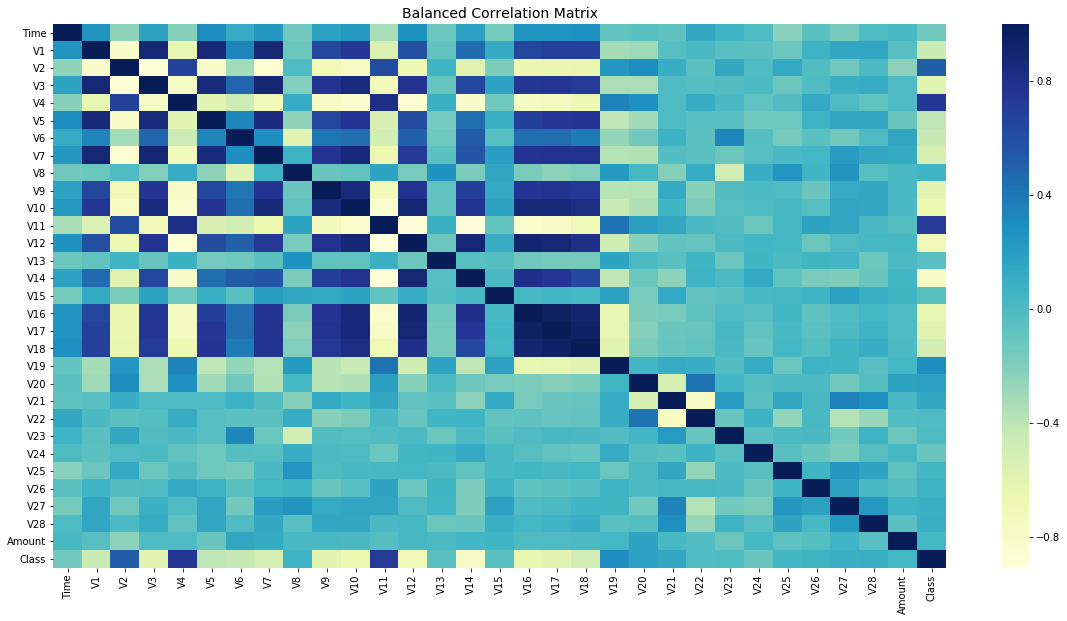

In [13]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Balanced Correlation Matrix", fontsize=14)
plt.show()

In [14]:
X = oversampled_train.drop('Class',axis=1)
y = oversampled_train['Class']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.90,test_size=0.10,)
print "Trainnig data",X_train.shape
print "Train label",y_train.shape
print "Test data",X_test.shape
print "Test Label",y_test.shape

Trainnig data (511767, 30)
Train label (511767,)
Test data (56863, 30)
Test Label (56863,)


In [15]:
from sklearn import metrics  #Additional scklearn functions
from sklearn import tree
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgbc = XGBClassifier(
 learning_rate =0.1,
 n_estimators=20,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [16]:
xgbc.fit(X,y,eval_metric='auc')
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [17]:
predictions = xgbc.predict(X_test)
print classification_report(y_true=y_test,y_pred=predictions)
print ("AUC score{:2.2}".format(roc_auc_score(y_test, predictions)))
cnf_matix = confusion_matrix(y_true=y_test,y_pred=predictions)
TP = cnf_matix[1,1]
TN = cnf_matix[0,0]
FP = cnf_matix[0,1]
FN = cnf_matix[1,0]
print("TP",TP) 
print("TN",TN) 
print("FP",FP) 
print("FN",FN)
print ("Recall= {}".format(TP/float(TP+FN)))
print ("Precison= {}".format(TP/float(TP+FP)))
print ("specificity= {}".format(TN / float(TN+FP)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28380
           1       0.99      0.97      0.98     28483

   micro avg       0.98      0.98      0.98     56863
   macro avg       0.98      0.98      0.98     56863
weighted avg       0.98      0.98      0.98     56863

AUC score0.98
('TP', 27715)
('TN', 28184)
('FP', 196)
('FN', 768)
Recall= 0.973036548116
Precison= 0.992977679051
specificity= 0.993093727977


In [22]:
from sklearn.model_selection import RandomizedSearchCV, KFold
param_dist = {'n_estimators': [10,20,30],
              'learning_rate': [1,0.1,],
              'max_depth': [3, 4, 5],
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(xgbc, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)
folds = KFold(n_splits = 3, shuffle = True)

In [24]:
estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    clf.fit(X_train, y_train)
    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += f1_score(y_test, results[test_index])

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  6.1min finished


NameError: name 'f1_score' is not defined

In [ ]:
score /= numFolds